# Code to reproduce manuscript figures
### Kristin Ludwicki | krl4005@med.cornell.edu


In [1]:
# IMPORT FUNCTIONS
import pandas as pd
import pickle
import myokit.lib.plots as mp
from scipy.stats import spearmanr
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter
from scipy import stats
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import numpy as np
from important_functions import get_torord_phys_data
import matplotlib.pyplot as plt

##########################################################################################################################################################
# SET UP FIGURE PARAMETERS
plt.rcParams['font.size'] = 18 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.constrained_layout.use'] = True

class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"

yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))

##########################################################################################################################################################
# DEFINE FUNCTIONS
def add_scalebar(axs, section):
    # FORMAT X AXIS
    if section == 0:
        xmin, xmax, ymin, ymax = axs.axis()
        scalebar = AnchoredSizeBar(axs.transData, 100, '100 ms', 'lower left', bbox_to_anchor = (0,-0.1), bbox_transform =axs.transAxes, pad=0.5, color='black', frameon=False, size_vertical=(ymax-ymin)*0.0001) #fontproperties=fontprops
        axs.add_artist(scalebar)
        axs.spines[['bottom']].set_visible(False)
        axs.tick_params(bottom=False)
        axs.tick_params(labelbottom=False)
    else:
        for i in list(range(0, len(section))):
            xmin, xmax, ymin, ymax = axs[section[i][0], section[i][1]].axis()
            scalebar = AnchoredSizeBar(axs[section[i][0], section[i][1]].transData, 100, '100 ms', 'lower left', bbox_to_anchor = (0,-0.2), bbox_transform =axs[section[i][0], section[i][1]].transAxes, pad=0.5, color='black', frameon=False, size_vertical=(ymax-ymin)*0.0001) #fontproperties=fontprops
            axs[section[i][0], section[i][1]].add_artist(scalebar)
            axs[section[i][0], section[i][1]].spines[['bottom']].set_visible(False)
            axs[section[i][0], section[i][1]].tick_params(bottom=False)
            axs[section[i][0], section[i][1]].tick_params(labelbottom=False)

def new_parameter_convergence(all_trials, fitness='fitness'):
    all_dicts = []

    
    for t in list(range(0, max(all_trials['trial']))):
        old_data = all_trials[(all_trials['trial']==t) & (all_trials['gen']==0)].sort_values(fitness).iloc[0:100]
        for g in list(range(0, max(all_trials[(all_trials['trial']==t)]['gen']))):
            data = all_trials[(all_trials['trial']==t) & (all_trials['gen']==g)].sort_values(fitness).iloc[0:100]
            data = pd.concat([old_data, data])
            data = data.drop_duplicates(subset=data.filter(like='multiplier').columns.to_list())
            data_var = data.sort_values(fitness).iloc[0:100].filter(like = 'multiplier').var().to_dict()
            data_var['generation'] = g
            data_var['trial'] = t
            all_dicts.append(data_var)
            old_data = data

    df_dicts = pd.DataFrame(all_dicts)

    average_dicts = []
    for g in list(range(0, max(df_dicts['generation']))):
        average_dicts.append(df_dicts[df_dicts['generation']==g].mean().to_dict())
    df_dicts_average = pd.DataFrame(average_dicts)
    
    return df_dicts_average

def get_sensitivities(all_trials, error):
    population = all_trials[all_trials['gen']==0].sort_values(error) 
    good_pop = population.iloc[0:160] #top 10% of the population
    bad_pop = population.iloc[160:len(population['gen'])] #remaining 90% of the population

    sensitivities = []
    pvalues = []
    for cond in good_pop.filter(like='multiplier').columns.to_list():
        stat, pvalue = stats.ks_2samp(good_pop[cond], bad_pop[cond])
        sensitivities.append(stat)
        pvalues.append(pvalue)
    return sensitivities, pvalues

##########################################################################################################################################################
# LOAD DATA
all_trials = pd.read_csv('./data/all_data.csv.gz')
fig2_data = pd.read_csv('./data/fig2_data.csv.gz')
best_data = pd.read_csv('./data/best_data.csv')
grandi_pop = pd.read_csv('./data/grandi_pop.csv.gz')
cond_data = pickle.load(open('./data/cond_data.pkl', 'rb'))

# Figure 1

**Graphical representation of the fitness function designed for genetic algorithm optimization.**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/407576121.py:70: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig1.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/407576121.py:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig1.png', trasparent=True)


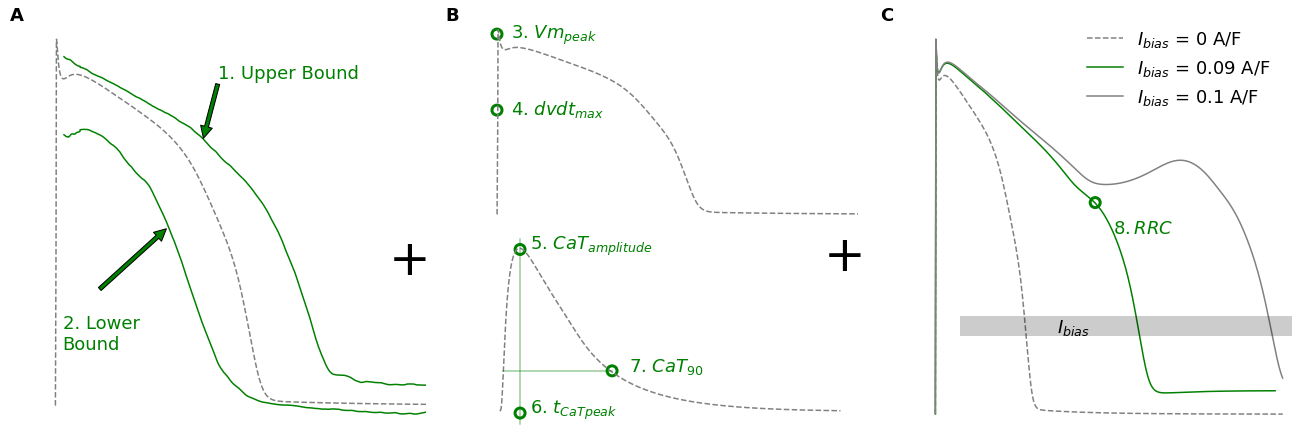

In [2]:
# SET UP FIGURE
fig = plt.figure(figsize = (18, 6)) 
gs = GridSpec(nrows=1, ncols=3, figure = fig)

sub0 = fig.add_subfigure(gs[0,0])
axs0= sub0.subplots()

sub1 = fig.add_subfigure(gs[0,1])
axs1= sub1.subplots(2)

sub2 = fig.add_subfigure(gs[0,2])
axs2= sub2.subplots()

##########################################################################################################################################################
## AP AND CAT TRACES
t, v_10, v_90 = get_torord_phys_data()
axs0.plot(t[200:len(t)], v_10[200:len(t)], color = 'green')
axs0.plot(t[200:len(t)], v_90[200:len(t)], color = 'green')
axs0.annotate('1. Upper Bound', xy=(200, 0), xytext=(220, 20), arrowprops = dict(facecolor='green'), color = 'green')
axs0.annotate('', xy=(150, -30), xytext=(60, -50), arrowprops = dict(facecolor='green'), color = 'green')
axs0.text(10, -70, '2. Lower \nBound', color = 'green')
axs0.plot(cond_data['BM']['dat']['engine.time'], cond_data['BM']['dat']['membrane.v'], color = 'grey', label = 'TorORd', linestyle = 'dashed')
axs0.set_xlim([-10, 500])
axs0.text(450, -45, '+', color = 'black', fontsize = 50)

axs1[0].plot(cond_data['BM']['dat']['engine.time'], cond_data['BM']['dat']['membrane.v'], color = 'grey', label = 'TorORd', linestyle = 'dashed')
axs1[0].scatter([0, 0], [-20, 30], s = 100, facecolor='none', edgecolors = 'green', linewidth=3.0)
axs1[0].text(20, -23, '4. $dvdt_{max}$', color = 'green')
axs1[0].text(20 , 27, '3. $Vm_{peak}$', color = 'green')
axs1[0].set_xlim([-20, 500])

axs1[1].plot(cond_data['BM']['dat']['engine.time'], cond_data['BM']['dat']['intracellular_ions.cai'], color = 'grey', linestyle = 'dashed')
axs1[1].plot([60, 60],[0.5e-4, 4e-4], color = 'green', alpha = 0.4)
axs1[1].plot([10, 330],[1.5e-4, 1.5e-4], color = 'green', alpha = 0.4)
axs1[1].scatter([60, 60, 330], [3.8e-4, 0.7e-4, 1.5e-4], s = 100, facecolor='none', edgecolors = 'green', linewidth=3.0)
axs1[1].text(90, 3.8e-4, '5. $CaT_{amplitude}$', color = 'green')
axs1[1].text(90, 0.7e-4, '6. $t_{CaT peak}$', color = 'green')
axs1[1].text(380, 1.5e-4, '7. $CaT_{90}$', color = 'green')
axs1[1].text(950, 3.4e-4, '+', color = 'black', fontsize = 50)

axs2.plot(cond_data['BM']['dat']['engine.time'], cond_data['BM']['dat']['membrane.v'], color = 'grey', label = '$I_{bias}$ = 0 A/F', linestyle = 'dashed')
axs2.plot(cond_data['BM']['data'][6]['t_rrc'], cond_data['BM']['data'][6]['v_rrc'], color = 'green', label = '$I_{bias}$ = 0.09 A/F', linestyle = 'solid')
axs2.plot(cond_data['BM']['data'][5]['t_rrc'], cond_data['BM']['data'][5]['v_rrc'], color = 'grey', label = '$I_{bias}$ = 0.1 A/F', linestyle = 'solid')
axs2.plot([100, 999],[-60, -60], color = 'black', alpha = 0.2, linewidth = 20)
axs2.text(350, -62, '$I_{bias}$', color = 'black')
axs2.scatter([460], [-20], s = 100, facecolor='none', edgecolors = 'green', linewidth=3.0)
axs2.text(510, -30, '$8. RRC$', color = 'green')
axs2.legend(frameon = False, bbox_to_anchor = (0.4,0.75))

##########################################################################################################################################################
# FORMAT AXIS
axs = [axs0, axs2, axs1[0], axs1[1]]
for a in axs:
    a.spines[['bottom']].set_visible(False)
    a.tick_params(bottom=False)
    a.tick_params(labelbottom=False)

    a.spines[['left']].set_visible(False)
    a.tick_params(left=False)
    a.tick_params(labelleft=False)

##########################################################################################################################################################
# LETTER LABELS
axs0.text(-0.1, 1, 'A', transform=axs0.transAxes, weight='bold')
axs1[0].text(-0.1, 1, 'B', transform=axs1[0].transAxes, weight='bold')
axs2.text(-0.1, 1, 'C', transform=axs2.transAxes, weight='bold')

##########################################################################################################################################################
# SAVE FIGURE
plt.savefig('./figures/fig1.pdf', trasparent=True)
plt.savefig('./figures/fig1.png', trasparent=True)

# Figure 2
**A genetic algorithm that optimizes for RRC while ensuring physiologic morphology**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/3008402242.py:77: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./figures/fig2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/3008402242.py:77: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/3008402242.py:77: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./figures/fig2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/3008402242.py:78: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./figures/fig2.png', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/3008402242.py:78: MatplotlibDepr

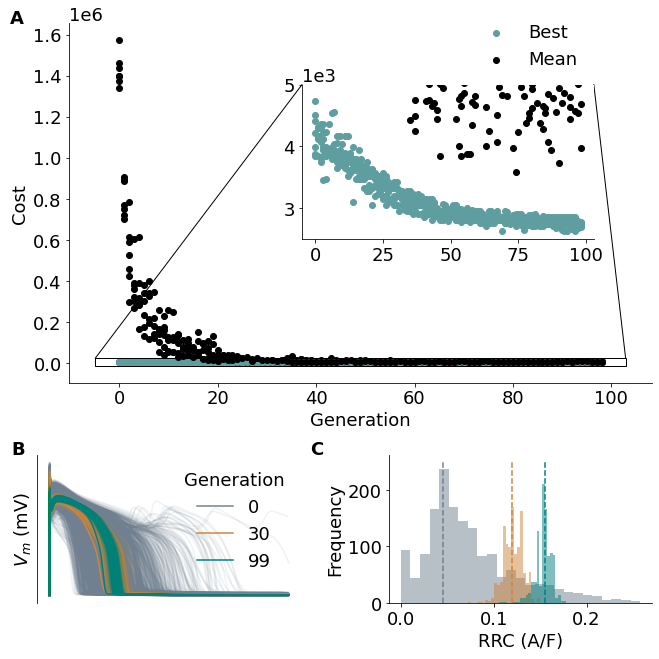

In [3]:
# SET UP FIGURE
fig = plt.figure(figsize = (9, 9)) 
gs = GridSpec(nrows=2, ncols=1, figure = fig, height_ratios=[1, 0.5]) 

sub4 = fig.add_subfigure(gs[0])
axs4= sub4.subplots()

sub5 = fig.add_subfigure(gs[1])
axs5 = sub5.subplots(1, 2)

##########################################################################################################################################################
# A) ERROR PLOT
axs4_in = axs4.inset_axes([0.4, 0.4, 0.5, 0.43])

for i in list(range(0, max(all_trials['trial']))):

    d = all_trials[all_trials['trial']==i]
    bsts = []
    avgs = []

    for g in list(range(0, max(d['gen']))):
        d_gen = d[d['gen']==g]['fitness'].to_list()
        bsts.append(min(d_gen))
        avgs.append(np.mean(d_gen))

    axs4.scatter(list(range(0, max(d['gen']))), bsts, color = 'cadetblue')
    axs4.scatter(list(range(0, max(d['gen']))), avgs, color = 'black')
    axs4_in.scatter(list(range(0, max(d['gen']))), bsts, color = 'cadetblue')
    axs4_in.scatter(list(range(0, max(d['gen']))), avgs, color = 'black')

axs4.set_ylabel('Cost')
axs4.set_xlabel('Generation');
axs4_in.set_ylim([-16000, 23000])
axs4.indicate_inset_zoom(axs4_in, edgecolor="black", alpha = 1)
axs4_in.set_ylim([2500, 5000])
axs4_in.legend(['Best', 'Mean'], loc='upper right', bbox_to_anchor = (1,1.5), frameon = False)
axs4_in.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

##########################################################################################################################################################
# B) AP and C) RRC PLOTs
gens = [0, 30, 99]
colors = ['slategrey', 'peru', 'teal']
for g in list(range(0, len(gens))):
    #HISTOGRAM
    axs5[1].hist(fig2_data[fig2_data['gen']==gens[g]]['rrc'], color = colors[g], alpha = 0.5, bins = 25, label = str(gens[g])) 

    for i in list(range(0, len(fig2_data[fig2_data['gen']==gens[g]]['gen']))):
        ind = fig2_data[fig2_data['gen']==gens[g]].sort_values('fitness').reset_index().iloc[i]
        
        # AP TRACES
        axs5[0].plot(eval(ind['t']), eval(ind['v']), color = colors[g], alpha = 0.1)
        if i == len(fig2_data[fig2_data['gen']==gens[g]]['gen'])-1:
            axs5[0].plot(eval(ind['t']), eval(ind['v']), color = colors[g], label = str(gens[g]))

axs5[0].set_ylabel('$V_m$ (mV)')
axs5[0].tick_params(left=False)
axs5[0].tick_params(labelleft=False)
axs5[0].spines[['bottom']].set_visible(False)
axs5[0].tick_params(bottom=False)
axs5[0].tick_params(labelbottom=False)
axs5[0].legend(frameon=False, title = 'Generation')

axs5[1].set_ylabel('Frequency')
axs5[1].set_xlabel('RRC (A/F)')
axs5[1].plot([0.045, 0.045], [0, 250], color = colors[0], linestyle = 'dashed')
axs5[1].plot([0.12, 0.12], [0, 250], color = colors[1], linestyle = 'dashed')
axs5[1].plot([0.155, 0.155], [0, 250], color = colors[2], linestyle = 'dashed')

##########################################################################################################################################################
# LETTER LABELS
axs4.text(-0.1, 1, 'A', transform=axs4.transAxes, weight='bold')
axs5[0].text(-0.1, 1, 'B', transform=axs5[0].transAxes, weight='bold')
axs5[1].text(-0.3, 1, 'C', transform=axs5[1].transAxes, weight='bold')

##########################################################################################################################################################
# SAVE FIGURE
plt.savefig('./figures/fig2.pdf', trasparent=True)
plt.savefig('./figures/fig2.png', trasparent=True)

# Figure 3
**The best individuals found by the genetic algorithm are physiologic and allow for an 80% increase in RRC compared to baseline.**


C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/2811935219.py:106: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig3.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/2811935219.py:107: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig3.png', trasparent=True, dpi = 300)


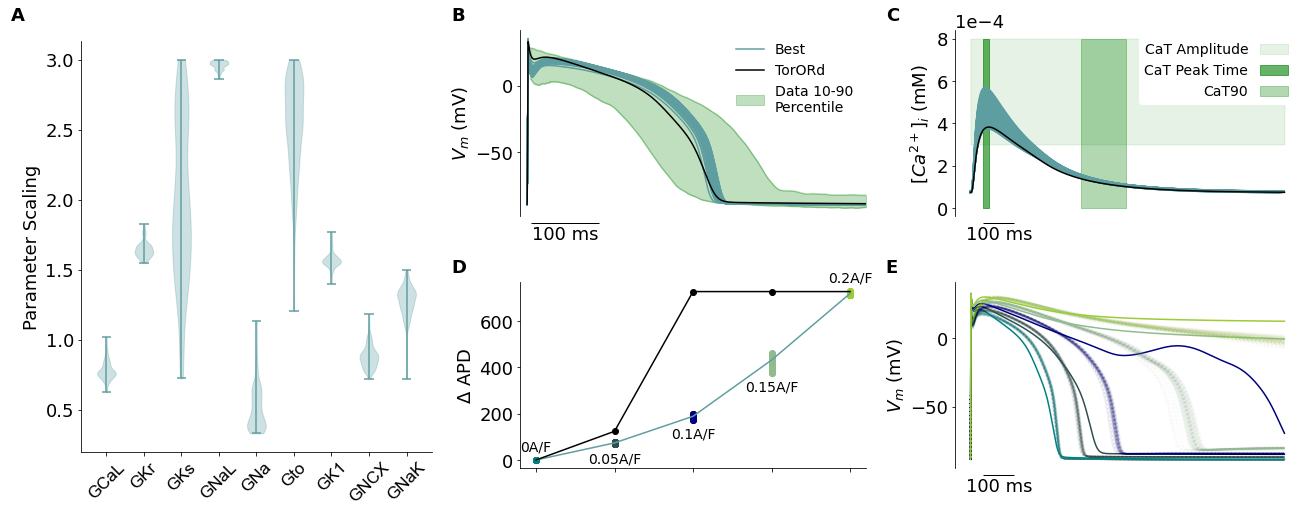

In [4]:
# SET UP FIGURE
fig = plt.figure(figsize = (18, 7)) 
gs = GridSpec(nrows=1, ncols=2, figure = fig,  width_ratios=[1, 2])

sub1 = fig.add_subfigure(gs[0])
axs1= sub1.subplots()

sub2 = fig.add_subfigure(gs[1])
axs= sub2.subplots(2, 2)

#########################################################################################################################
# A) VIOLIN PLOT
violin = axs1.violinplot(best_data.filter(like = 'multiplier'))
for vp in violin['bodies']:
    vp.set_facecolor('cadetblue')
    vp.set_edgecolor('cadetblue')

for partname in ('cbars','cmins','cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor('cadetblue')

axs1.set_ylabel('Parameter Scaling')
axs1.set_xticks(list(range(1, 10)))
axs1.set_xticklabels(['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK'], rotation = 45, fontname="Arial", fontsize = 17);


#########################################################################################################################
# B) AP AND C) CAT TRACES
t, v_10, v_90 = get_torord_phys_data()
axs[0, 0].plot(t, v_10, color = 'green', alpha = 0.25)
axs[0, 0].plot(t, v_90, color = 'green', alpha = 0.25)
axs[0, 0].fill_between(t, v_10, v_90, color='green', alpha = 0.25, label = 'Data 10-90\nPercentile')

for i in list(range(0, len(best_data['gen']))):
    if i == 0:
        axs[0, 0].plot(eval(best_data['t'][i]),eval(best_data['v'][i]), color = 'cadetblue', label = 'Best')
    else:
        axs[0, 0].plot(eval(best_data['t'][i]),eval(best_data['v'][i]), color = 'cadetblue')
    axs[0, 1].plot(eval(best_data['t'][i]), eval(best_data['cai'][i]), color = 'cadetblue')

axs[0, 0].plot(cond_data['BM']['dat']['engine.time'], cond_data['BM']['dat']['membrane.v'], color = 'black', label = 'TorORd')
axs[0, 1].plot(cond_data['BM']['dat']['engine.time'], cond_data['BM']['dat']['intracellular_ions.cai'], color = 'black')

axs[0, 0].set_ylabel('$V_m$ (mV)')
axs[0, 0].set_xlim([-10, 500])
axs[0, 0].legend(frameon = False, fontsize = 14)

axs[0, 1].set_ylabel('$[Ca^{2+}]_i$ (mM)')
axs[0, 1].fill_between(cond_data['BM']['dat']['engine.time'], [3E-4]*len(cond_data['BM']['dat']['engine.time']), [8E-4]*len(cond_data['BM']['dat']['engine.time']), color='green', alpha = 0.1, label = 'CaT Amplitude')
axs[0, 1].fill_between(cond_data['BM']['dat']['engine.time'], 0.0008, 0, where = (np.array(cond_data['BM']['dat']['engine.time'].tolist())>40) &  (np.array(cond_data['BM']['dat']['engine.time'].tolist())<60), color='green', alpha = 0.6, label = 'CaT Peak Time')
axs[0, 1].fill_between(cond_data['BM']['dat']['engine.time'], 0.0008, 0, where = (np.array(cond_data['BM']['dat']['engine.time'].tolist())>350) &  (np.array(cond_data['BM']['dat']['engine.time'].tolist())<500), color='green', alpha = 0.3, label = 'CaT90')
axs[0, 1].legend(frameon = True, fontsize = 14, markerfirst=False, edgecolor = 'white', facecolor = 'white', framealpha=1)
axs[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

#########################################################################################################################
# D) RRC TRACES
rrc_data = pd.read_csv('./data/rrc_data.csv')
stims = [0, 0.05, 0.1, 0.15, 0.2]
cols = ['teal', 'darkslategray', 'navy', 'darkseagreen', 'yellowgreen']
means = []
for i in list(range(0, len(stims))):
    #BASELINE DATA
    base_data = rrc_data['delapd_'+str(stims[i])][220]
    axs[1,0].scatter(i, base_data, color = 'black')
    
    #OPTIMIZED DATA
    y_data = rrc_data['delapd_'+str(stims[i])][0:220].tolist()
    means.append(np.mean(y_data))
    axs[1,0].scatter([i]*len(y_data), y_data, color = cols[i])
    if y_data[0]<5 or y_data[0]>500:
        axs[1,0].annotate(str(stims[i])+'A/F', (i, y_data[0]+40), ha='center', fontsize = 14)
    else:
        axs[1,0].annotate(str(stims[i])+'A/F', (i, min(y_data)-80), ha='center', fontsize = 14)

axs[1,0].plot(list(range(0, len(means))), means, color = 'cadetblue', label = 'Best')
axs[1,0].plot(list(range(0, len(means))), rrc_data.filter(like='delapd').iloc[220].tolist(), color = 'black', label = 'ToR-ORd')
axs[1,0].set_xticks(list(range(0, len(stims))))
axs[1,0].set_xticklabels(stims);
axs[1,0].set_ylabel('$\Delta$ APD')
axs[1, 0].tick_params(labelbottom=False)

#########################################################################################################################
# E) RRC AP TRACES
for s in list(range(0,len(stims))):
    for i in list(range(0, len(rrc_data['i_cal_pca_multiplier'])-1)):
        axs[1,1].plot(eval(rrc_data['t_'+str(stims[s])][i])[0], eval(rrc_data['v_'+str(stims[s])][i])[0], color = cols[s], alpha = 0.02, linestyle = 'dotted')

    axs[1,1].plot(eval(rrc_data['t_'+str(stims[s])][220])[0], eval(rrc_data['v_'+str(stims[s])][220])[0], color = cols[s], label = str(stims[s])+'A/F')

axs[1,1].set_ylabel('$V_m$ (mV)')

#########################################################################################################################
# FORMAT X AXIS
add_scalebar(axs, [[0,0], [1,1], [0,1]])

#########################################################################################################################
# LETTER LABELS
axs1.text(-0.2, 1.05, 'A', transform=axs1.transAxes, weight='bold')
axs[0,0].text(-0.2, 1.05, 'B', transform=axs[0,0].transAxes, weight='bold')
axs[0,1].text(-0.2, 1.05, 'C', transform=axs[0,1].transAxes, weight='bold')
axs[1,0].text(-0.2, 1.05, 'D', transform=axs[1,0].transAxes, weight='bold')
axs[1,1].text(-0.2, 1.05, 'E', transform=axs[1,1].transAxes, weight='bold')

#########################################################################################################################
# SAVE FIGURE
plt.savefig('./figures/fig3.pdf', trasparent=True)
plt.savefig('./figures/fig3.png', trasparent=True, dpi = 300)

# Figure 4
**GA optimization is most sensitive to IKR, IK1, ICaL, and INCX but INaL plays a key role in later generations to balance high RRC and physiologic APD.**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/2636368701.py:100: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig4.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/2636368701.py:101: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig4.png', dpi=300, trasparent=True)


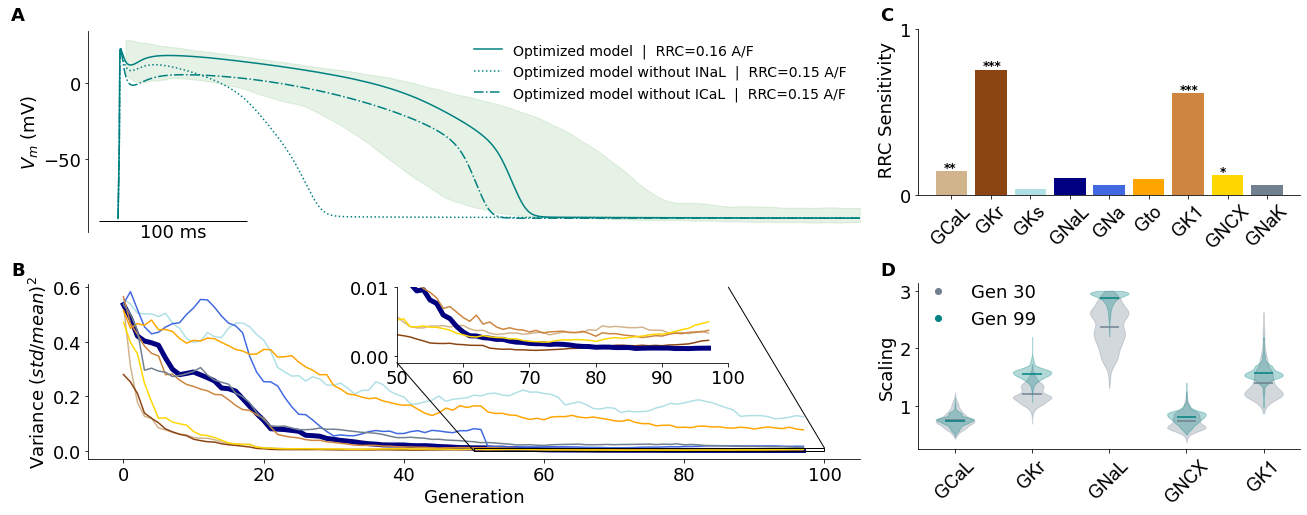

In [5]:
# SET UP FIGURE
fig = plt.figure(figsize = (18, 7)) 
gs = GridSpec(nrows=2, ncols=2, figure = fig, width_ratios=[2, 1]) #height_ratios=[2, 1], width_ratios=[2, 1]

sub0 = fig.add_subfigure(gs[1, 0])
axs0 = sub0.subplots()

sub2 = fig.add_subfigure(gs[0, 1])
axs2= sub2.subplots()

sub1 = fig.add_subfigure(gs[0, 0])
axs1= sub1.subplots()

sub3 = fig.add_subfigure(gs[1, 1])
axs3= sub3.subplots()

##########################################################################
# A) AP TRACES
t, v_10, v_90 = get_torord_phys_data()
axs1.fill_between(t, v_10, v_90, color='green', alpha = 0.1)
axs1.plot(cond_data['OM']['data'][0]['t_rrc'], cond_data['OM']['data'][0]['v_rrc'], label = 'Optimized model  |  RRC='+str(round(cond_data['OM']['RRC'],2))+ ' A/F', color ='teal')
axs1.plot(cond_data['OM1']['data'][0]['t_rrc'], cond_data['OM1']['data'][0]['v_rrc'], label = 'Optimized model without INaL  |  RRC='+str(round(cond_data['OM1']['RRC'],2))+ ' A/F', linestyle = 'dotted', color ='teal')
axs1.plot(cond_data['OM3']['data'][0]['t_rrc'], cond_data['OM3']['data'][0]['v_rrc'], label = 'Optimized model without ICaL  |  RRC='+str(round(cond_data['OM3']['RRC'],2))+ ' A/F', linestyle = 'dashdot', color ='teal')
axs1.set_xlim([-20, 500])
axs1.legend(frameon = False, fontsize = 14)
axs1.set_ylabel('$V_m$ (mV)')
add_scalebar(axs1, 0)

##########################################################################
# B) PROGRESSION ANALYSIS
axs0_in = axs0.inset_axes([0.4, 0.55, 0.43, 0.43]) 
df_dicts_average = new_parameter_convergence(all_trials);
conds = df_dicts_average.filter(like='multiplier').columns.tolist();
cond_labels = ['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK']
cond_colors = ['tan', 'saddlebrown', 'powderblue', 'navy', 'royalblue', 'orange', 'peru', 'gold', 'slategrey']
for c in list(range(0, len(conds))):
    if cond_labels[c] == 'GNaL':
        w = 5
    else:
        w = 1.5

    axs0.plot(df_dicts_average['generation'], df_dicts_average[conds[c]].tolist(), label = cond_labels[c], color = cond_colors[c], linewidth = w);
    axs0_in.plot(df_dicts_average['generation'], df_dicts_average[conds[c]].tolist(), label = cond_labels[c], color = cond_colors[c], linewidth = w);
axs0.set_ylabel('Variance $(std/mean)^2$')
axs0.set_xlabel('Generation')
axs0_in.set_xlim([50,100])
axs0_in.set_ylim([-0.001, 0.01])
axs0.indicate_inset_zoom(axs0_in, edgecolor="black", alpha = 1)

##########################################################################################################
# C) Multiparameter sensitivity analysis
errors = ['rrc_error']
labels = ['RRC Fitness']

sensitivities, pvalues = get_sensitivities(all_trials, errors[0])
axs2.bar(list(range(0, len(sensitivities))), sensitivities, color = cond_colors)
axs2.set_xticks(list(range(0, len(sensitivities))))
axs2.set_xticklabels(cond_labels, rotation = 45, fontname="Arial");

axs2.set_yticks([0, 1])

for i in list(range(0, len(sensitivities))):
    label = ''
    if pvalues[i] < 0.05: 
        label = '*'
    if pvalues[i] < 0.01: 
        label = '**'
    if pvalues[i] < 0.001: 
        label = '***'
    axs2.text(i-0.2,sensitivities[i], label, fontsize = 12, fontweight ='bold', color ='black')   

axs2.set_ylabel(' RRC Sensitivity') 

##########################################################################
# D) VIOLIN PLOT
gens = [30, 99]
colors = ['slategrey', 'teal']
for g in list(range(0, len(gens))):
    violin = axs3.violinplot(all_trials[all_trials['gen']==gens[g]].sort_values('fitness').reset_index().filter(['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_nal_multiplier', 'i_NCX_multiplier', 'i_k1_multiplier']), showextrema=False, showmeans=True)
    for vp in violin['bodies']:
        vp.set_facecolor(colors[g])
        vp.set_edgecolor(colors[g])
    violin['cmeans'].set_edgecolor(colors[g])

axs3.set_ylabel('Scaling')
axs3.set_xticks(np.arange(1, len(all_trials[all_trials['gen']==gens[g]].sort_values('fitness').reset_index().filter(['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_nal_multiplier', 'i_NCX_multiplier', 'i_k1_multiplier']).iloc[0].to_list())+1, 1))
axs3.set_xticklabels(['GCaL', 'GKr', 'GNaL', 'GNCX', 'GK1'], rotation = 45, fontname="Arial");
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors]
axs3.legend(markers, ['Gen 30', 'Gen 99'], numpoints=1, frameon=False, bbox_to_anchor = (0.35,1.1))

##########################################################################################################################################################
# LETTER LABELS
axs1.text(-0.1, 1.05, 'A', transform=axs1.transAxes, weight='bold')
axs0.text(-0.1, 1.05, 'B', transform=axs0.transAxes, weight='bold')
axs2.text(-0.1, 1.05, 'C', transform=axs2.transAxes, weight='bold')
axs3.text(-0.1, 1.05, 'D', transform=axs3.transAxes, weight='bold')

##########################################################################################################################################################
# SAVE FIGURE
plt.savefig('./figures/fig4.pdf', trasparent=True)
plt.savefig('./figures/fig4.png', dpi=300, trasparent=True)


# Figure 5
**ICaL cannot increase APD without decreasing RRC**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/1474928808.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig5.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/1474928808.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig5.png', dpi = 300, trasparent=True)


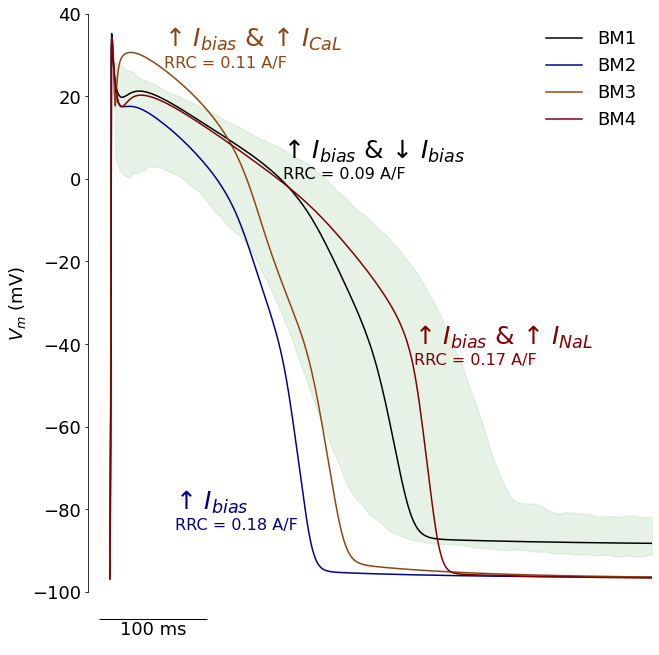

In [6]:
# SET UP FIGURE
fig, axs0 = plt.subplots(1, figsize = (9,9), constrained_layout = True)

##########################################################################################################
# ACTION POTENTIAL TRACES
t, v_10, v_90 = get_torord_phys_data()

labs = ['BM1', 'BM2', 'BM3', 'BM4']
lab_info1 = ['\u2191 $I_{bias}$ & \u2193 $I_{bias}$', '\u2191 $I_{bias}$', '\u2191 $I_{bias}$ & \u2191 $I_{CaL}$', '\u2191 $I_{bias}$ & \u2191 $I_{NaL}$']
lab_info2 = ['RRC = 0.09 A/F', 'RRC = 0.18 A/F', 'RRC = 0.11 A/F', 'RRC = 0.17 A/F']
lines = ['solid', 'solid', 'solid', 'solid']
colors = ['black', 'navy', 'saddlebrown', 'maroon']
x_pos = [160, 60, 50, 280]
y_pos = [5, -80, 32, -40]

for l in list(range(0, len(labs))):
    if l == 0:
        axs0.fill_between(t, v_10, v_90, color='green', alpha = 0.1)
        add_scalebar(axs0, 0)
    axs0.plot(cond_data[labs[l]]['dat']['engine.time'], cond_data[labs[l]]['dat']['membrane.v'], label = labs[l], linestyle = lines[l], color = colors[l]) 
    axs0.text(x_pos[l], y_pos[l], lab_info1[l], color = colors[l], fontsize = 25)
    axs0.text(x_pos[l], y_pos[l]-5, lab_info2[l], color = colors[l], fontsize = 16)
    axs0.legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1,1))
    axs0.set_ylabel('$V_m$ (mV)')
    axs0.set_xlim([-20, 500])
    axs0.set_ylim([-100, 40])

##########################################################################################################
# SAVE FIGURE
plt.savefig('./figures/fig5.pdf', trasparent=True)
plt.savefig('./figures/fig5.png', dpi = 300, trasparent=True)

# Figure 6
**Unlike INaL, ICaL is correlated with NCX which prohibits it from increasing APD without decreasing RRC**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/1575072163.py:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig6.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/1575072163.py:75: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig6.png', trasparent=True, dpi = 300)


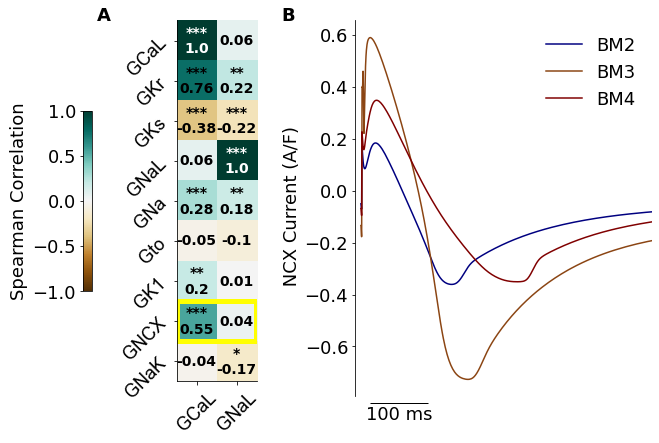

In [8]:
# SET UP FIGURE
fig = plt.figure(figsize = (9, 6)) 
gs = GridSpec(nrows=1, ncols=2, figure = fig, width_ratios=[2.8, 4])

sub1 = fig.add_subfigure(gs[0])
axs1= sub1.subplots()

sub2 = fig.add_subfigure(gs[1])
axs2= sub2.subplots()

#######################################################################################################
# A) CORRELATION MATRIX
stat = spearmanr
color_map = 'BrBG'
cond_labels = ['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK']
cond_labels_x = ['GCaL', 'GNaL']


low_rrc_data = all_trials[(all_trials['rrc_error']<2800) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)].filter(like = 'multiplier')

low_corr = low_rrc_data.corr(method = 'spearman')
low_pval = low_rrc_data.corr(method=lambda x, y: stat(x, y)[1]) - np.eye(*low_corr.shape)

low_corr.drop(labels=['i_kr_multiplier', 'i_ks_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier'], axis=1, inplace=True)
low_pval.drop(labels=['i_kr_multiplier', 'i_ks_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier'], axis=1, inplace=True)

im = axs1.imshow(low_corr, cmap = color_map, vmin=-1, vmax=1)

# Show all ticks and label them with the respective list entries.
axs1.set_xticks(np.arange(len(cond_labels_x)))
axs1.set_xticklabels(cond_labels_x, rotation = 45, fontname="Arial");
axs1.set_yticks(np.arange(len(cond_labels)))
axs1.set_yticklabels(cond_labels, rotation = 45, fontname="Arial");

texts = []
for i in range(low_corr.shape[0]):
    for j in range(low_corr.shape[1]):
        t = str(round(low_corr.iloc[i,j], 2))
        pval = low_pval.iloc[i,j]
        p = ''
        c = 'black'
        if pval < 0.05: 
            p = '*\n'
        if pval < 0.01: 
            p = '**\n'
        if pval < 0.001: 
            p = '***\n'
        if low_corr.iloc[i,j]>0.8 or low_corr.iloc[i,j]<-0.8:
            c = 'white'
        text = im.axes.text(j, i, p+t, color = c, ha="center", va="center", fontsize=14, fontweight="bold")
        texts.append(text)

cbar = axs1.figure.colorbar(im, ax=axs1, shrink = 0.5, location = 'left')
cbar.ax.set_ylabel('Spearman Correlation', rotation=90, va="bottom")
axs1.add_patch(Rectangle((-0.48, 6.5), 1.97, 1, fill=False, edgecolor='yellow', lw=5))

#######################################################################################################
# B) NCX CURRENT
axs2.plot(cond_data['BM2']['dat']['engine.time'], cond_data['BM2']['dat']['INaCa.INaCa_i'], linestyle = 'solid', color = 'navy', label = 'BM2')
axs2.plot(cond_data['BM3']['dat']['engine.time'], cond_data['BM3']['dat']['INaCa.INaCa_i'], linestyle = 'solid', color ='saddlebrown', label = 'BM3') 
axs2.plot(cond_data['BM4']['dat']['engine.time'], cond_data['BM4']['dat']['INaCa.INaCa_i'], linestyle = 'solid', color ='maroon', label = 'BM4') 
axs2.set_ylabel(' NCX Current (A/F)')
axs2.set_xlim([-10,500])
axs2.legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1,1))
add_scalebar(axs2, 0)

#######################################################################################################
# LETTER LABELS
axs1.text(-1, 1, 'A', transform=axs1.transAxes, weight='bold')
axs2.text(-0.25, 1, 'B', transform=axs2.transAxes, weight='bold')

#######################################################################################################
# SAVE FIGURE
plt.savefig('./figures/fig6.pdf', trasparent=True)
plt.savefig('./figures/fig6.png', trasparent=True, dpi = 300)

# Figure 7
**The RRC of the baseline Grandi et al model is decreased 67% compared to ToR-ORd and does not include late sodium.**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/646540910.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig7.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/646540910.py:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig7.png', trasparent=True, dpi = 300)


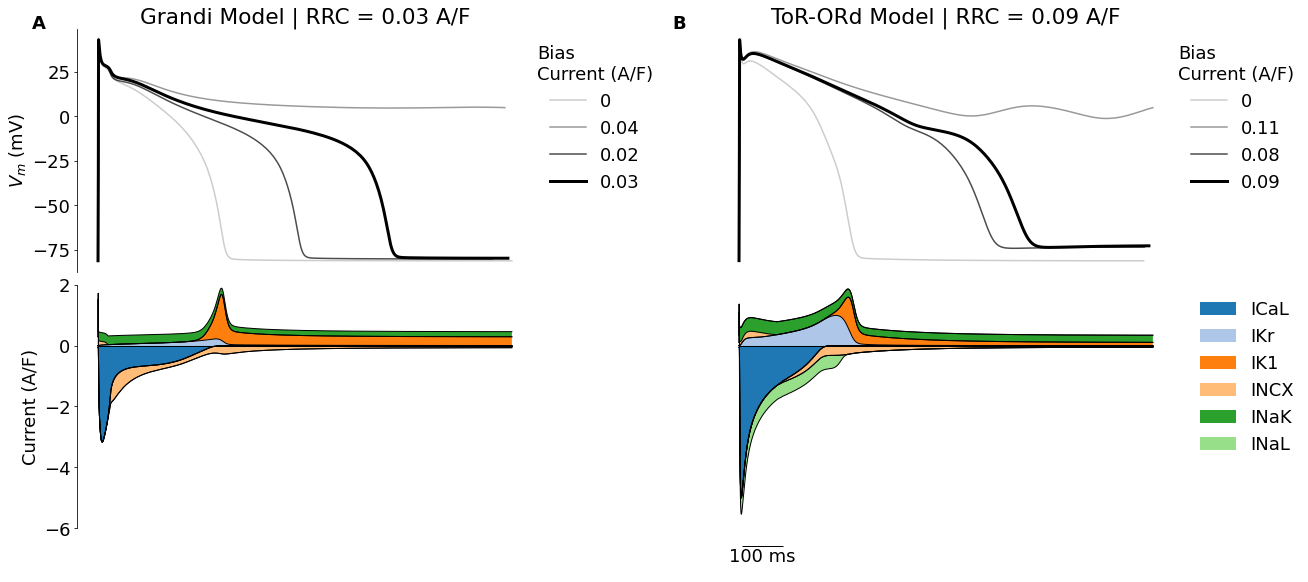

In [9]:
# SET UP FIGURE
fig, axs = plt.subplots(2, 2, figsize = (18, 8), constrained_layout = True)

#######################################################################################################
# A) GRANDI and B) TORORD MODEL AP TRACES AND CURRENTS
stim_index = [0, 4, 6, 7]
a = [0.2, 0.4, 0.7, 1]
for i in list(range(0, len(stim_index))):
    lw = 1.5
    if i == 3:
        lw = 3
    axs[0, 1].plot(cond_data['BM']['data'][stim_index[i]]['t_rrc'], cond_data['BM']['data'][stim_index[i]]['v_rrc'], label = str(round(cond_data['BM']['data'][stim_index[i]]['stim'],2)), color = 'black', alpha = a[i], linewidth = lw)
axs[0,1].legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1.3,1), title = 'Bias\nCurrent (A/F)')
axs[0,1].set_title('ToR-ORd Model | RRC = 0.09 A/F')

stim_index = [0, 4, 5, 8]
for i in list(range(0, len(stim_index))):
    lw = 1.5
    if i == 3:
        lw = 3
    axs[0, 0].plot(cond_data['GBM']['data'][stim_index[i]]['t_rrc'], cond_data['GBM']['data'][stim_index[i]]['v_rrc'], label = str(round(cond_data['GBM']['data'][stim_index[i]]['stim'],2)), color = 'black', alpha = a[i], linewidth = lw)
axs[0,0].legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1.3,1), title = 'Bias\nCurrent (A/F)')
axs[0,0].set_title('Grandi Model | RRC = 0.03 A/F')
axs[0,0].set_ylabel('$V_m$ (mV)')

currents_t = ['ICaL.ICaL', 'IKr.IKr', 'IK1.IK1', 'INaCa.INaCa_i', 'INaK.INaK', 'INaL.INaL']
currents_g = ['I_Ca.I_Ca', 'I_Kr.I_kr','I_Ki.I_ki', 'I_NCX.I_ncx', 'I_NaK.I_nak']
mp.cumulative_current(cond_data['BM']['dat'], currents_t, axs[1, 1], normalise=False, labels = ['ICaL', 'IKr', 'IK1', 'INCX', 'INaK', 'INaL'])
mp.cumulative_current(cond_data['GBM']['dat'], currents_g, axs[1, 0], normalise=False)
axs[1,1].set_ylim([-6, 2])
axs[1,0].set_ylim([-6, 2])
axs[1,0].set_ylabel('Current (A/F)')
axs[1,1].legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1.3,1))

section = [[0,0], [0,1], [1,0], [1,1]]
for i in list(range(0, len(section))):
    if i == len(section)-1:
        xmin, xmax, ymin, ymax = axs[section[i][0], section[i][1]].axis()
        scalebar = AnchoredSizeBar(axs[section[i][0], section[i][1]].transData, 100, '100 ms', 'lower left', bbox_to_anchor = (0,-0.2), bbox_transform =axs[section[i][0], section[i][1]].transAxes, pad=0.5, color='black', frameon=False, size_vertical=(ymax-ymin)*0.0001)
        axs[section[i][0], section[i][1]].add_artist(scalebar)
    axs[section[i][0], section[i][1]].spines[['bottom']].set_visible(False)
    axs[section[i][0], section[i][1]].tick_params(bottom=False)
    axs[section[i][0], section[i][1]].tick_params(labelbottom=False)

    if i == 1 or i == 3:
        axs[section[i][0], section[i][1]].spines[['left']].set_visible(False)
        axs[section[i][0], section[i][1]].tick_params(left=False)
        axs[section[i][0], section[i][1]].tick_params(labelleft=False)

#######################################################################################################
# LETTER LABELS
axs[0,0].text(-0.1, 1, 'A', transform=axs[0,0].transAxes, weight='bold')
axs[0,1].text(-0.1, 1, 'B', transform=axs[0,1].transAxes, weight='bold')

#######################################################################################################
# SAVE FIGURE
plt.savefig('./figures/fig7.pdf', trasparent=True)
plt.savefig('./figures/fig7.png', trasparent=True, dpi = 300)



# Figure 8
**The Grandi model cannot have an increased RRC and physiologic APD without the addition of INaL.**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/3849395365.py:70: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig8.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/3849395365.py:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/fig8.png', trasparent=True, dpi = 300)


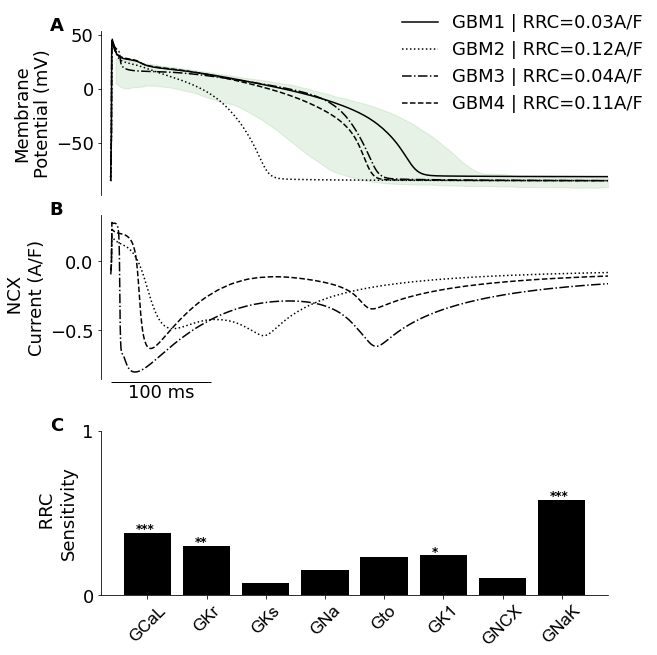

In [10]:
# SET UP FIGURE
fig, axs = plt.subplots(3, figsize = (9, 9), constrained_layout = True)
cond_labels_g = ['GCaL', 'GKr', 'GKs', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK']
lines = ['solid', 'dotted', 'dashdot', 'dashed']
labs = ['GBM1', 'GBM2', 'GBM3', 'GBM4']

##########################################################################################################
# A) AP TRACES
t, v_10, v_90 = get_torord_phys_data()
axs[0].fill_between(t, v_10, v_90, color='green', alpha = 0.1)
for l in list(range(0, len(labs))):
    axs[0].plot(cond_data[labs[l]]['dat']['engine.time'], cond_data[labs[l]]['dat']['membrane.v'], label = labs[l]+' | RRC='+str(round(cond_data[labs[l]]['RRC'],2))+ 'A/F', linestyle = lines[l], color = 'black')

axs[0].set_xlim([-10, 500])
axs[0].legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1.1,1.2))
axs[0].set_ylabel('Membrane\nPotential (mV)')

######################################################################################
# B) NCX CURRENT TRACES
axs[1].plot(cond_data['GBM2']['dat']['engine.time'], cond_data['GBM2']['dat']['I_NCX.I_ncx'], label = 'GBM2', linestyle = lines[1], color = 'black')
axs[1].plot(cond_data['GBM3']['dat']['engine.time'], cond_data['GBM3']['dat']['I_NCX.I_ncx'], label = 'GBM3', linestyle = lines[2], color = 'black') 
axs[1].plot(cond_data['GBM4']['dat']['engine.time'], cond_data['GBM4']['dat']['I_NCX.I_ncx'], label = 'GBM4', linestyle = lines[3], color = 'black') 
axs[1].set_ylabel(' NCX\nCurrent (A/F)')
axs[1].set_xlim([-10,500])

######################################################################################
# C) MULTIPARAMETER SENSTIVITY ANALYSIS
errors = ['rrc_error']
labels = ['RRC Fitness']
sensitivities, pvalues = get_sensitivities(grandi_pop, errors[0])
axs[2].bar(list(range(0, len(sensitivities))), sensitivities, color = 'black')
axs[2].set_xticks(list(range(0, len(sensitivities))))
axs[2].set_xticklabels(cond_labels_g, rotation = 45, fontname="Arial", fontsize = 17);
axs[2].set_yticks([0, 1])

for i in list(range(0, len(sensitivities))):
    label = ''
    if pvalues[i] < 0.05: 
        label = '*'
    if pvalues[i] < 0.01: 
        label = '**'
    if pvalues[i] < 0.001: 
        label = '***'
    axs[2].text(i-0.2,sensitivities[i], label, fontsize = 12, fontweight ='bold', color ='black')   

axs[2].set_ylabel(' RRC\nSensitivity') 

##########################################################################################################
# FORMAT AXIS 
section = [0, 1, 2]
for i in list(range(0, len(section))):
    if i == 0 or i == 1:
        axs[i].spines[['bottom']].set_visible(False)
        axs[i].tick_params(bottom=False)
        axs[i].tick_params(labelbottom=False)
    
    if i == 1:
        xmin, xmax, ymin, ymax = axs[i].axis()
        scalebar = AnchoredSizeBar(axs[i].transData, 100, '100 ms', 'lower left', bbox_to_anchor = (0,-0.2), bbox_transform =axs[i].transAxes, pad=0.5, color='black', frameon=False, size_vertical=(ymax-ymin)*0.0001)
        axs[i].add_artist(scalebar)

##########################################################################################################
# LETTER LABELS
axs[0].text(-0.1, 1, 'A', transform=axs[0].transAxes, weight='bold')
axs[1].text(-0.1, 1, 'B', transform=axs[1].transAxes, weight='bold')
axs[2].text(-0.1, 1, 'C', transform=axs[2].transAxes, weight='bold')

##########################################################################################################
# SAVE FIGURE 
plt.savefig('./figures/fig8.pdf', trasparent=True)
plt.savefig('./figures/fig8.png', trasparent=True, dpi = 300)

# Figure S1
**Evolution of the best individuals in GA optimization and their respective cost componenets**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/1211458141.py:82: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('figures/figS1.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/1211458141.py:83: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('figures/figS1.png', trasparent=True, dpi = 300)


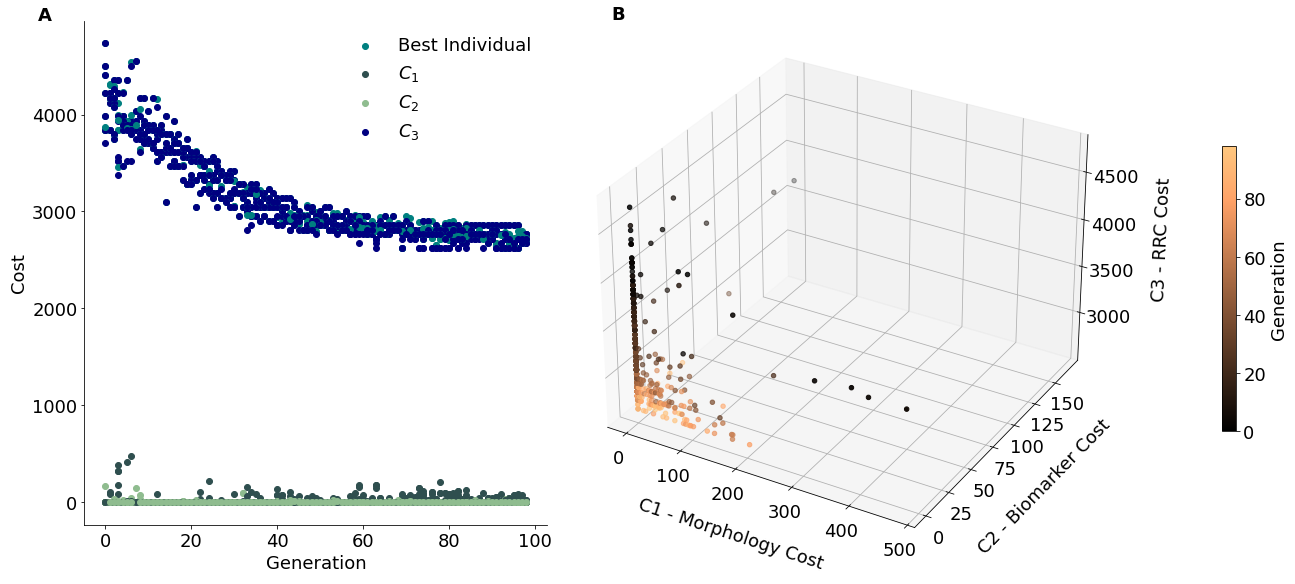

In [11]:
# SET UP FIGURE
fig = plt.figure(figsize = (18, 8)) 
gs = GridSpec(nrows=1, ncols=2, figure = fig) 

ax = fig.add_subplot(gs[1], projection='3d')

sub1 = fig.add_subfigure(gs[0])
axs= sub1.subplots()

######################################################################################
# A) ERROR PLOT 
labs = ['C3', 'C2', 'C1']
colors = ['teal', 'darkslategray', 'darkseagreen', 'navy', 'yellowgreen']

for i in list(range(0, max(all_trials['trial']))):

    d = all_trials[all_trials['trial']==i]
    bsts = []
    c1_bsts = []
    c2_bsts = []
    c3_bsts = []

    for g in list(range(0, max(d['gen']))):
        d_gen = d[d['gen']==g]
        min_data = d_gen[d_gen['fitness']==min(d_gen['fitness'])]
        bsts.append(min_data['fitness'].tolist()[0])
        c1_bsts.append(min_data['total_morph_error'].tolist()[0])
        c2_bsts.append(min_data['total_feature_error'].tolist()[0])
        c3_bsts.append(min_data['rrc_error'].tolist()[0])

    if i == 0:
        axs.scatter(list(range(0, max(d['gen']))), bsts, color = colors[0], label = 'Best Individual') 
        axs.scatter(list(range(0, max(d['gen']))), c1_bsts, color = colors[1], label = '$C_1$')
        axs.scatter(list(range(0, max(d['gen']))), c2_bsts, color = colors[2], label = '$C_2$')
        axs.scatter(list(range(0, max(d['gen']))), c3_bsts, color = colors[3], label = '$C_3$')

    axs.scatter(list(range(0, max(d['gen']))), bsts,  color = colors[0])
    axs.scatter(list(range(0, max(d['gen']))), c1_bsts, color = colors[1])
    axs.scatter(list(range(0, max(d['gen']))), c2_bsts, color = colors[2])
    axs.scatter(list(range(0, max(d['gen']))), c3_bsts, color = colors[3])

axs.set_ylabel('Cost')
axs.set_xlabel('Generation');
axs.legend(bbox_to_anchor = (1, 1), frameon=False)

######################################################################################
# B) 3D SCATTER PLOT 
morph_errors = []
feature_errors = []
rrc_errors = []
fitness = []
gen = []

for t in list(range(0, max(all_trials['trial']))):
    for g in list(range(0, max(all_trials[(all_trials['trial']==t)]['gen']))):
        data = all_trials[(all_trials['trial']==t) & (all_trials['gen']==g)]
        best_ind = data[data['fitness']==min(data['fitness'])]
        morph_errors.append(best_ind['total_morph_error'].tolist()[0])
        feature_errors.append(best_ind['total_feature_error'].tolist()[0])
        rrc_errors.append(best_ind['rrc_error'].tolist()[0])
        fitness.append(best_ind['fitness'].tolist()[0])
        gen.append(best_ind['gen'].tolist()[0])

im = ax.scatter(morph_errors, feature_errors, rrc_errors, c=gen, cmap='copper')

ax.set_xlabel('C1 - Morphology Cost', labelpad=20)
ax.set_ylabel('C2 - Biomarker Cost', labelpad=20)
ax.set_zlabel('C3 - RRC Cost', labelpad=28)
ax.tick_params(axis='z', which='major', pad=10)


cbar = fig.colorbar(im, ax=ax, shrink = 0.5, pad = 0.2)
cbar.ax.set_ylabel('Generation', rotation=90)

######################################################################################
# LETTER LABELS
ax.text(50,400,24800, 'B', transform=ax.transAxes, weight='bold')
axs.text(-0.1, 1, 'A', transform=axs.transAxes, weight='bold')

######################################################################################
# SAVE FIGURE
plt.savefig('figures/figS1.pdf', trasparent=True)
plt.savefig('figures/figS1.png', trasparent=True, dpi = 300)



# Figure S2
**Correlations between specific ion-channels are present in a group of cells with high RRC but not in a group with low RRC.**


C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/673424172.py:102: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/figS2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/673424172.py:103: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/figS2.png', trasparent=True, dpi = 300)


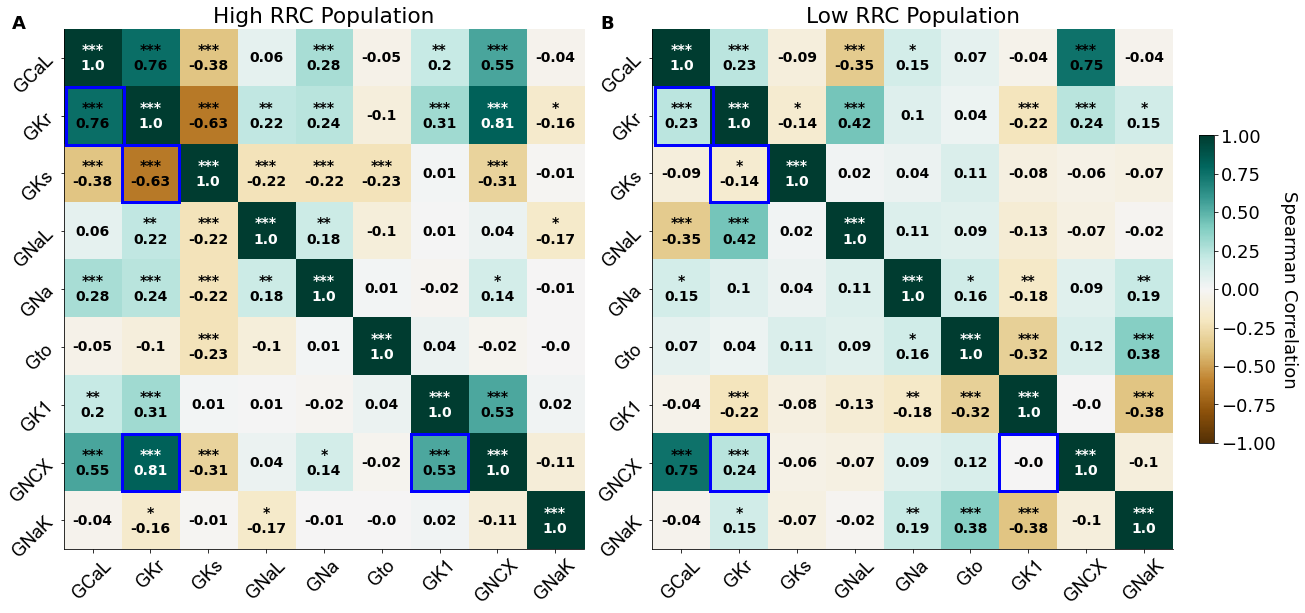

In [12]:
# SET UP FIGURE
fig, axs1 = plt.subplots(1,2, figsize = (18,9), constrained_layout = True)

######################################################################################
# A) HIGH RRC CORR MATRIX
stat = spearmanr
color_map = 'BrBG'
cond_labels = ['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK']

low_rrc_data = all_trials[(all_trials['rrc_error']<2800) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)].filter(like = 'multiplier')
low_corr = low_rrc_data.corr(method = 'spearman')
low_pval = low_rrc_data.corr(method=lambda x, y: stat(x, y)[1]) - np.eye(*low_corr.shape)
im = axs1[0].imshow(low_corr, cmap = color_map, vmin=-1, vmax=1)

# Show all ticks and label them with the respective list entries.
axs1[0].set_xticks(np.arange(len(cond_labels)))
axs1[0].set_xticklabels(cond_labels, rotation = 45, fontname="Arial");
axs1[0].set_yticks(np.arange(len(cond_labels)))
axs1[0].set_yticklabels(cond_labels, rotation = 45, fontname="Arial");
axs1[0].set_title('High RRC Population')

texts = []
for i in range(low_corr.shape[0]):
    for j in range(low_corr.shape[1]):
        t = str(round(low_corr.iloc[i,j], 2))
        pval = low_pval.iloc[i,j]
        p = ''
        c = 'black'
        if pval < 0.05: 
            p = '*\n'
        if pval < 0.01: 
            p = '**\n'
        if pval < 0.001: 
            p = '***\n'
        if low_corr.iloc[i,j]>0.8 or low_corr.iloc[i,j]<-0.8:
            c = 'white'
        text = im.axes.text(j, i, p+t, color = c, ha="center", va="center", fontsize=14, fontweight="bold")
        texts.append(text)

######################################################################################
# B) LOW RRC CORR MATRIX
high_rrc_data = all_trials[(all_trials['rrc_error']>5200) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)].filter(like = 'multiplier')
high_rrc_data = high_rrc_data[high_rrc_data['i_k1_multiplier']<0.5] #This is here to remove an IK1 outlier which is in the last row of the dataframe
high_corr = high_rrc_data.corr(method = 'spearman')
high_pval = high_rrc_data.corr(method=lambda x, y: stat(x, y)[1]) - np.eye(*high_corr.shape)
im = axs1[1].imshow(high_corr, cmap = color_map, vmin=-1, vmax=1)

# Show all ticks and label them with the respective list entries.
axs1[1].set_xticks(np.arange(len(cond_labels)))
axs1[1].set_xticklabels(cond_labels, rotation = 45, fontname="Arial");
axs1[1].set_yticks(np.arange(len(cond_labels)))
axs1[1].set_yticklabels(cond_labels, rotation = 45, fontname="Arial");
axs1[1].set_title('Low RRC Population')

# Create colorbar
cbar = axs1[1].figure.colorbar(im, ax=axs1[1], shrink=0.5)
cbar.ax.set_ylabel('Spearman Correlation', rotation=-90, va="bottom")

texts = []
for i in range(high_corr.shape[0]):
    for j in range(high_corr.shape[1]):
        t = str(round(high_corr.iloc[i,j], 2))
        pval = high_pval.iloc[i,j]
        p = ''
        c = 'black'
        if pval < 0.05: 
            p = '*\n'
        if pval < 0.01: 
            p = '**\n'
        if pval < 0.001: 
            p = '***\n'
        if high_corr.iloc[i,j]>0.8 or high_corr.iloc[i,j]<-0.8:
            c = 'white'
        text = im.axes.text(j, i, p+t, color = c, fontsize=14, fontweight="bold", ha="center", va="center")
        texts.append(text)

######################################################################################
# ADD RECTANGLES
# IKr and ICaL
axs1[0].add_patch(Rectangle((-0.46, 0.5), 1, 1, fill=False, edgecolor='blue', lw=3))
axs1[1].add_patch(Rectangle((-0.46, 0.5), 1, 1, fill=False, edgecolor='blue', lw=3))

# IKr and IKs
axs1[0].add_patch(Rectangle((0.5, 1.5), 1, 1, fill=False, edgecolor='blue', lw=3))
axs1[1].add_patch(Rectangle((0.5, 1.5), 1, 1, fill=False, edgecolor='blue', lw=3))

# IKr and NCX; 
axs1[0].add_patch(Rectangle((0.5, 6.5), 1, 1, fill=False, edgecolor='blue', lw=3))
axs1[1].add_patch(Rectangle((0.5, 6.5), 1, 1, fill=False, edgecolor='blue', lw=3))

#IK1 and NCX; 
axs1[0].add_patch(Rectangle((5.5, 6.5), 1, 1, fill=False, edgecolor='blue', lw=3))
axs1[1].add_patch(Rectangle((5.5, 6.5), 1, 1, fill=False, edgecolor='blue', lw=3))

######################################################################################
# LETTER LABELS
axs1[0].text(-0.1, 1, 'A', transform=axs1[0].transAxes, weight='bold')
axs1[1].text(-0.1, 1, 'B', transform=axs1[1].transAxes, weight='bold')

######################################################################################
# SAVE FIGURE
plt.savefig('./figures/figS2.pdf', trasparent=True)
plt.savefig('./figures/figS2.png', trasparent=True, dpi = 300)


# Figure S3
**Pair-wise relationships between profile ion-channel conductances.**


C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/2136755767.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/figS3.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_3312/2136755767.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./figures/figS3.png', trasparent=True, dpi = 300)


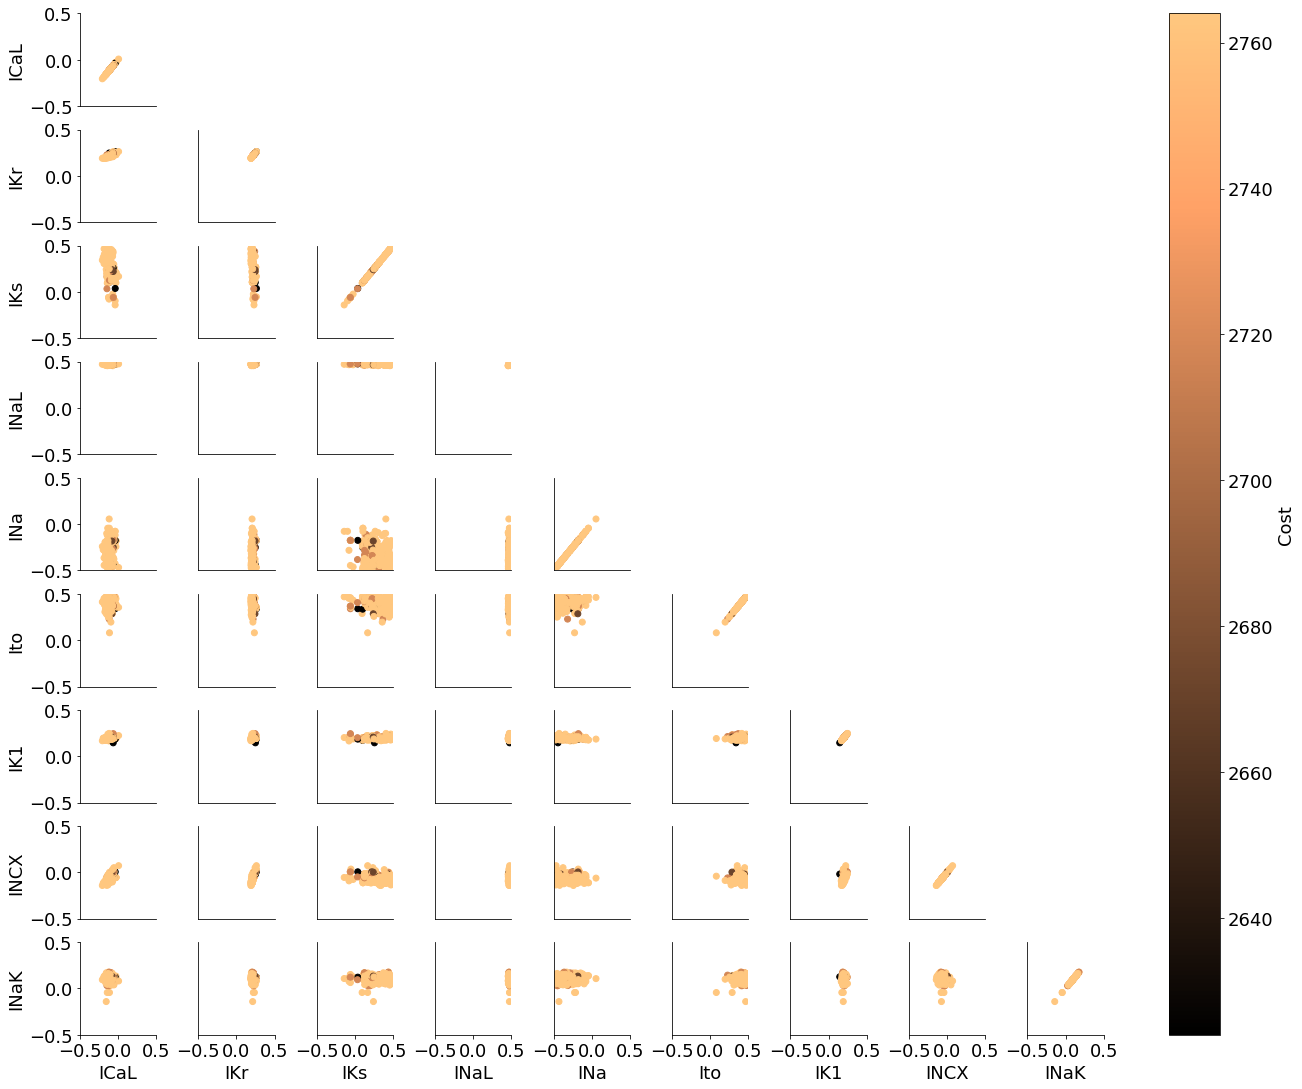

In [13]:
# SET UP FIGURE
fig, axs = plt.subplots(9,9, figsize = (18,15), constrained_layout = True)

######################################################################################
# PAIRWISE SCATTER PLOTS
low_rrc_data = all_trials[(all_trials['rrc_error']<2800) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)].filter(['fitness', 'i_cal_pca_multiplier', 'i_kr_multiplier', 'i_ks_multiplier', 'i_nal_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier'])
low_rrc_data = low_rrc_data.reset_index()

conds = low_rrc_data.filter(like='multiplier').columns.tolist()
labs = ['ICaL', 'IKr', 'IKs', 'INaL', 'INa', 'Ito', 'IK1', 'INCX', 'INaK']
for c1 in list(range(0, len(conds))):
    for c2 in list(range(0, len(conds))):
        im = axs[c1, c2].scatter(np.log10(np.array(low_rrc_data[conds[c2]])), np.log10(np.array(low_rrc_data[conds[c1]])), c=low_rrc_data.fitness, cmap='copper')
        axs[c1, c2].set_xlim([-0.5, 0.5])
        axs[c1, c2].set_ylim([-0.5, 0.5])

        if c1 == 8:
            axs[c1, c2].set_xlabel(labs[c2])
        else: 
            axs[c1, c2].xaxis.set_visible(False) # Hide only x axis
        
        if c2 == 0:
            axs[c1, c2].set_ylabel(labs[c1])
        else:
            axs[c1, c2].yaxis.set_visible(False) # Hide only y axis
        
        if c2 > c1:
            fig.delaxes(axs[c1, c2])

cbar = fig.colorbar(im, ax=axs)
cbar.ax.set_ylabel('Cost', rotation=90)

######################################################################################
# SAVE FIGURE
plt.savefig('./figures/figS3.pdf', trasparent=True)
plt.savefig('./figures/figS3.png', trasparent=True, dpi = 300)
